In [44]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from aquaponics import Aquaponics
imode = 6

In [48]:
a = Aquaponics('hydroplant', 'hydronitrogen', N0=0, I0=5e6, T0=25, kswitch=100)
m = a.get_model()

tf = 45
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

a.dNadd.STATUS = 1
a.dNadd.DCOST = 1
# a.dNadd.DMAX = 0.1
# a.dNadd.UPPER = 1

m.Obj(-a.w + 100 * a.dNadd)
m.options.MAX_ITER = 500
m.options.OTOL = 10
m.options.RTOL = 10

a.solve(glamdring=True, imode=imode, disp=True, solver=3)

apmonitor 192.168.17.25_294865947 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           22
   Intermediates:            8
   Connections  :            0
   Equations    :           16
   Residuals    :            8
 
 Number of state variables:          13050
 Number of total equations: -        12600
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            450
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contain

  68  3.1941844e+03 1.19e+01 1.82e+05   0.0 3.38e+01   1.4 9.23e-02 1.62e-01h  1
  69  3.8718549e+03 9.51e+00 1.48e+05   0.0 2.85e+01   1.0 1.75e-01 2.05e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  4.3912203e+03 7.63e+00 1.09e+05   0.0 2.22e+01   1.4 2.68e-01 3.37e-01h  1
  71  2.5874906e+03 3.94e+00 1.56e+05   0.0 8.69e+00   0.9 3.59e-01 1.00e+00f  1
  72  2.8748297e+03 3.86e+00 1.53e+05   1.0 3.39e+01   1.3 3.42e-02 1.97e-02f  1
  73  9.8225741e+03 1.65e+00 7.50e+03   0.8 5.57e+00   1.8 4.59e-01 1.00e+00f  1
  74  1.3099822e+04 5.77e-01 1.35e+04   1.0 2.98e+00   1.3 4.48e-01 7.83e-01f  1
  75  1.3123456e+04 2.88e-01 3.05e+03   0.8 1.41e+00   1.7 8.33e-01 1.00e+00f  1
  76  1.2194420e+04 1.35e-01 1.89e+03   0.1 3.39e-01   2.1 9.82e-01 5.35e-01f  1
  77  1.1592276e+04 1.20e-01 3.09e+03  -0.7 5.91e-01   1.7 1.00e+00 1.09e-01f  1
  78  9.4912368e+03 2.18e-02 3.20e+02  -1.7 2.25e-01   2.1 1.00e+00 8.29e-01f  1
  79  6.6856933e+03 6.11e-02

Text(0.5,0,'Time (days)')

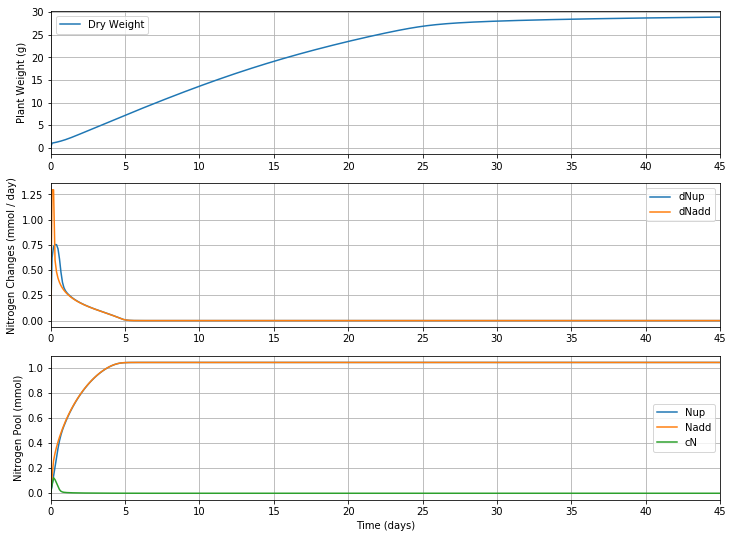

In [51]:
%matplotlib inline
plt.figure(figsize=(12,9))
ax = plt.subplot(311)
plt.plot(m.time, a.w, label='Dry Weight')
plt.grid()
plt.legend()
plt.ylabel('Plant Weight (g)')

plt.subplot(312, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.plot(m.time, a.dNadd, label='dNadd')
plt.grid()
plt.legend()
plt.ylabel('Nitrogen Changes (mmol / day)')

plt.subplot(313, sharex=ax)
plt.plot(m.time, a.Nup, label='Nup')
plt.plot(m.time, a.Nadd, label='Nadd')
plt.plot(m.time, a.cN, label='cN')
plt.grid()
plt.legend()
plt.ylabel('Nitrogen Pool (mmol)')


plt.xlim(0, tf)
plt.xlabel('Time (days)')

In [4]:
dNadd = a.dNadd

In [5]:
a = Aquaponics('hydroplant', 'hydronitrogen', N0=0, kswitch=10)
m = a.get_model()

m.time = np.linspace(0,tf,steps)
a.dNadd.value = list(dNadd.value)

a.solve(glamdring=True, imode=7, disp=False, solver=3)

Text(0.5,0,'Time (days)')

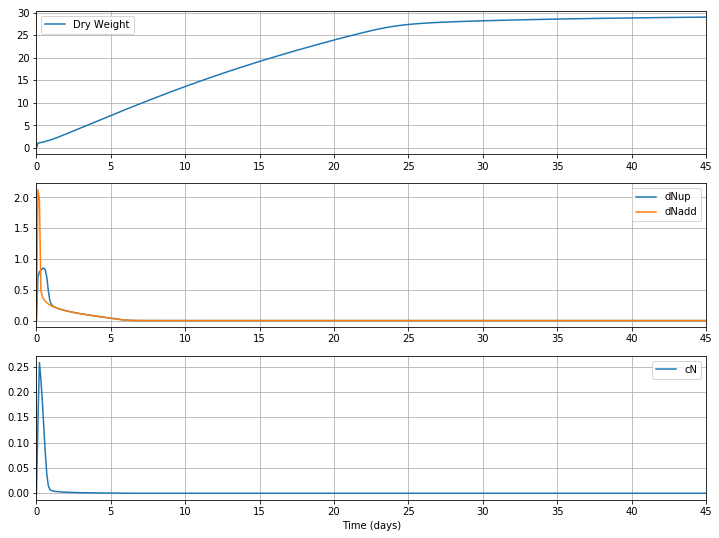

In [6]:
%matplotlib inline
plt.figure(figsize=(12,9))
ax = plt.subplot(311)
plt.plot(m.time, a.w, label='Dry Weight')
plt.grid()
plt.legend()

plt.subplot(312, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.plot(m.time, a.dNadd, label='dNadd')
plt.grid()
plt.legend()

plt.subplot(313, sharex=ax)
plt.plot(m.time, a.cN, label='cN')
plt.grid()
plt.legend()


plt.xlim(0, tf)
plt.xlabel('Time (days)')

In [7]:
print(dNadd.value)

[0.0, 2.12447, 1.955266, 0.4790929, 0.3896606, 0.3433868, 0.3121823, 0.2886758, 0.2698491, 0.2541385, 0.240604, 0.2286743, 0.2179883, 0.2082982, 0.1994243, 0.1912311, 0.1836138, 0.1764899, 0.1697927, 0.163468, 0.157471, 0.1517639, 0.1463148, 0.1410966, 0.1360856, 0.1312615, 0.1266061, 0.1221037, 0.1177399, 0.1135022, 0.109379, 0.1053597, 0.1014347, 0.09759509, 0.09383249, 0.09013899, 0.08650707, 0.08292949, 0.07939919, 0.07590925, 0.07245279, 0.06902293, 0.06561272, 0.06221513, 0.05882306, 0.05542938, 0.0520271, 0.04860963, 0.04517126, 0.04170796, 0.03821854, 0.03470643, 0.03118214, 0.02766615, 0.02419211, 0.0208087, 0.01757872, 0.01457303, 0.01185923, 0.009487917, 0.007482207, 0.0058353, 0.004516212, 0.003479825, 0.002676662, 0.002059765, 0.001588299, 0.001228694, 0.0009543402, 0.0007446324, 0.0005838523, 0.0004601126, 0.0003644643, 0.0002901823, 0.0002322102, 0.0001867398, 0.000150895, 0.000122496, 9.988423e-05, 8.179228e-05, 6.724747e-05, 5.549981e-05, 4.596836e-05, 3.820106e-05, 3.

In [8]:
a = Aquaponics('hydroplant', 'hydronitrogen', N0=0, Twindow=5)
m = a.get_model()

tf = 45
steps = tf * 10 + 1
m.time = np.linspace(0,tf,steps)

a.dNadd.value = dNadd
a.T.STATUS = 1
# a.T.DMAX = 0.1
# a.T.DCOST = 100

p = np.zeros(steps)
p[-1] = 1
final = m.Param(value=p)

m.Obj(-a.w * final + a.T)
m.options.MAX_ITER = 500

a.solve(glamdring=True, imode=imode, disp=True, solver=3)

apmonitor 192.168.17.25_610307314 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :           24
   Intermediates:            8
   Connections  :            0
   Equations    :           16
   Residuals    :            8
 
 Number of state variables:          10801
 Number of total equations: -        10800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contain

 103r 9.0118022e+03 4.84e+00 1.36e+03  -4.3 8.50e-03   5.2 1.00e+00 4.43e-02f  1
 104r 9.0111344e+03 4.84e+00 1.21e+03  -4.2 3.16e-03   5.6 1.00e+00 9.50e-02f  1
 105r 9.0111277e+03 4.84e+00 2.88e+04  -4.2 8.38e-03   5.1 1.00e+00 8.92e-03f  1
 106r 9.0111279e+03 4.84e+00 2.31e+04  -4.2 3.14e-03   5.5 1.00e+00 2.19e-01f  1
 107r 9.0111281e+03 4.84e+00 2.18e+04  -4.3 9.76e-03   5.1 1.00e+00 6.01e-02f  1
 108r 9.0111282e+03 4.84e+00 1.84e+04  -4.3 3.53e-03   5.5 1.00e+00 1.42e-01f  1
 109r 9.0111284e+03 4.84e+00 1.66e+04  -4.3 1.11e-02   5.0 1.00e+00 7.04e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110r 9.0111284e+03 4.84e+00 1.44e+04  -3.9 3.97e-03   5.4 1.00e+00 9.35e-02f  1
 111r 9.0111285e+03 4.84e+00 1.28e+04  -3.8 1.24e-02   5.0 1.00e+00 7.98e-02f  1
 112r 9.0111286e+03 4.84e+00 1.12e+04  -4.3 4.47e-03   5.4 1.00e+00 1.27e-01f  1
 113r 9.0111288e+03 4.84e+00 1.01e+04  -4.0 1.37e-02   4.9 1.00e+00 5.61e-02f  1
 114r 9.0111288e+03 4.84e+00

 241r 9.0111301e+03 4.84e+00 1.08e+03  -7.8 6.20e-03   5.2 1.00e+00 4.33e-02f  1
 242r 9.0111302e+03 4.84e+00 1.08e+03  -7.8 2.32e-03   5.7 1.00e+00 4.70e-02f  1
 243r 9.0111302e+03 4.84e+00 1.08e+03  -7.6 6.97e-03   5.2 1.00e+00 3.77e-02f  1
 244r 9.0111302e+03 4.84e+00 1.08e+03  -7.7 2.62e-03   5.6 1.00e+00 5.41e-02f  1
 245r 9.0111303e+03 4.84e+00 1.08e+03  -7.3 7.84e-03   5.1 1.00e+00 3.07e-02f  1
 246r 9.0111303e+03 4.84e+00 1.08e+03  -7.6 2.94e-03   5.6 1.00e+00 6.33e-02f  1
 247r 9.0111304e+03 4.84e+00 3.84e+03  -3.8 7.66e-06   8.7 4.49e-01 1.00e+00f  1
 248r 9.0111304e+03 4.84e+00 4.94e+03  -5.5 8.03e-07   9.1 1.00e+00 1.65e-01f  1
 249r 9.0111303e+03 4.84e+00 1.74e+03  -4.2 2.42e-06   8.6 1.00e+00 5.56e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250r 9.0111303e+03 4.84e+00 1.08e+03  -5.4 9.06e-07   9.1 1.00e+00 7.36e-01f  1
 251r 9.0111303e+03 4.84e+00 1.08e+03  -6.8 2.73e-06   8.6 1.00e+00 4.28e-01f  1
 252r 9.0111303e+03 4.84e+00

 292r 9.0111303e+03 4.84e+00 1.08e+03  -9.0 8.63e-05   7.1 8.00e-01 5.63e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 293r 9.0111303e+03 4.84e+00 1.08e+03  -9.0 3.24e-05   7.5 1.00e+00 1.41e-01f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 294r 9.0111303e+03 4.84e+00 1.08e+03  -9.0 9.71e-05   7.0 1.00e+00 3.49e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 295r 9.0111303e+03 4.84e+00 1.08e+03  -9.0 3.64e-05   7.5 1.00e+00 1.68e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 296r 9.0111303e+03 4.84e+00 1.08e+03  -9.0 1.09e-04   7.0 1.00e+00 1.65e-01f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 297r 9.0111303e+03 4.84e+00 1.08e+03  -9.

 344r 9.0111307e+03 4.84e+00 1.08e+03  -9.0 2.31e-04   6.7 1.00e+00 3.37e-04f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 345r 9.0111307e+03 4.84e+00 1.08e+03  -9.0 6.92e-04   6.2 1.00e+00 9.44e-03f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 346r 9.0111307e+03 4.84e+00 1.08e+03  -9.0 2.59e-04   6.6 1.00e+00 5.24e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 347r 9.0111308e+03 4.84e+00 1.08e+03  -9.0 7.78e-04   6.1 1.00e+00 1.55e-01f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 348r 9.0111308e+03 4.84e+00 1.08e+03  -9.0 2.92e-04   6.6 1.00e+00 4.14e-03f  1
 349r 9.0111308e+03 4.84e+00 1.08e+03  -9.

 397r 9.0111311e+03 4.84e+00 1.07e+03  -9.0 3.59e-06   8.5 1.00e+00 1.00e+00f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 398r 9.0111311e+03 4.84e+00 1.07e+03  -9.0 1.08e-05   8.0 1.00e+00 1.00e+00f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 399r 9.0111311e+03 4.84e+00 1.50e+03  -7.0 6.42e-05   7.5 9.92e-01 3.55e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400r 9.0111311e+03 4.84e+00 1.07e+03  -8.9 1.21e-05   7.9 1.00e+00 1.85e-03f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 401r 9.0111311e+03 4.84e+00 1.07e+03  -8.7 3.64e-05   7.5 1.00e+00 5.66e-01f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error f

 498r 9.0111333e+03 4.84e+00 1.07e+03  -9.0 6.08e-05   7.2 1.00e+00 8.08e-02f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
 499r 9.0111333e+03 4.84e+00 1.07e+03  -9.0 2.28e-05   7.7 1.00e+00 3.37e-01f  1

 Error return from ma97_factor. Error flag =  -7
 Matrix found to be singular
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500r 9.0111333e+03 4.84e+00 1.07e+03  -7.0 6.84e-05   7.2 1.00e+00 9.31e-01f  1

Number of Iterations....: 500

                                   (scaled)                 (unscaled)
Objective...............:   8.0098962525025712e+01    9.0111332840653922e+03
Dual infeasibility......:   8.9833593159497946e+02    1.0106279230443519e+05
Constraint violation....:   4.8407121275461291e+00    4.8407121275461291e+00
Complementarity.........:   3.3826602434897371e-07    3.8054927739259546e-05
Overall NLP error.......:   

In [9]:
print(a.T.DCOST)

AttributeError: DCOST